In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os.path
import urllib.request 

In [61]:
#Define the data directory and file paths
#Create a directory for data if it doesn't exist
DATA_DIR = "data/"
os.makedirs(DATA_DIR, exist_ok=True)

ATAC_SEQ_PATH = os.path.join(DATA_DIR, "ImmGenATAC18_AllOCRsInfo.csv")
RNA_SEQ_PATH = os.path.join(DATA_DIR, "mmc2.csv")
MMC1_PATH = os.path.join(DATA_DIR, "mmc1.xlsx")
REFFLAT_PATH = os.path.join(DATA_DIR, "refFlat.txt.gz")

#Check if data files are already downloaded and if not, download them
#ATAC-seq
if not os.path.isfile(ATAC_SEQ_PATH):
    urllib.request.urlretrieve("https://sharehost.hms.harvard.edu/immgen/ImmGenATAC18_AllOCRsInfo.csv", ATAC_SEQ_PATH)

#RNA-seq    
if not os.path.isfile(RNA_SEQ_PATH):
    urllib.request.urlretrieve("https://www.cell.com/cms/10.1016/j.cell.2018.12.036/attachment/4392da81-c56e-471a-b1df-0e72f03ecd77/mmc2.csv", RNA_SEQ_PATH)

if not os.path.isfile(MMC1_PATH):
    urllib.request.urlretrieve("https://www.cell.com/cms/10.1016/j.cell.2018.12.036/attachment/e5df7329-d77d-40b3-a03a-34bdbe4b402c/mmc1.xlsx", MMC1_PATH)
    
if not os.path.isfile(REFFLAT_PATH):
    urllib.request.urlretrieve("http://hgdownload.cse.ucsc.edu/goldenPath/mm10/database/refFlat.txt.gz", REFFLAT_PATH)

#Load the ATAC-seq data
atac = pd.read_csv(ATAC_SEQ_PATH, index_col=[0,1,2])
#atac.index.names = ["peakID", "chrom"]

#Load the RNA-seq data
rna = pd.read_csv(RNA_SEQ_PATH, index_col=0)

#Load the meta data
meta1 = pd.read_excel(MMC1_PATH, sheet_name="SortedPopulations")
meta1 = meta1.set_index("SampleName")
meta2 = pd.read_excel(MMC1_PATH, sheet_name="Read Statistics")
meta2 = meta2.set_index("sample.name")

#Load the annotation data
refFlat = pd.read_csv(REFFLAT_PATH, sep="\t", header=None, comment="#", compression="gzip")
refFlat.columns = ["geneName", "name", "chrom", "strand", "txStart", "txEnd",
    "cdsStart", "cdsEnd", "exonCount", "exonStarts", "exonEnds"]

c:\Users\luisw\miniconda3\envs\data_analysis\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


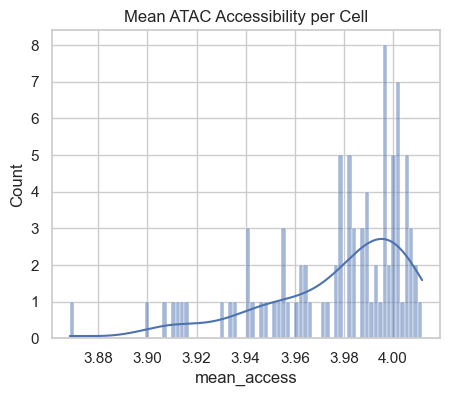

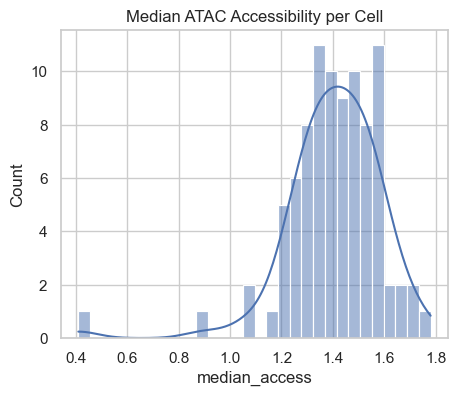

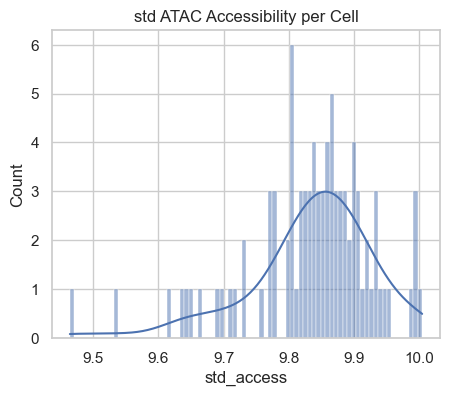

,mean_access,median_access,std_access
LTHSC.34-.BM,3.868438,0.41,10.004101
LTHSC.34+.BM,4.005767,1.64,9.986633
STHSC.150-.BM,4.001125,0.90,9.991892
MPP4.135+.BM,4.002324,1.58,9.994831
proB.CLP.BM,4.008413,1.26,9.772241
...,...,...,...
FRC.SLN,3.998828,1.47,9.808067
IAP.SLN,3.987949,1.40,9.614775
BEC.SLN,3.983416,1.54,9.709456
LEC.SLN,3.976234,1.57,9.715224


In [ ]:
sns.set_theme(style="whitegrid")

# 1. Compute per‐cell stats
cell_stats = pd.DataFrame({
    "mean_access":   atac.mean(axis=0, numeric_only=True),
    "median_access": atac.median(axis=0, numeric_only=True),
    "std_access":    atac.std(axis=0, numeric_only=True)
})
#remove data that aren't cell populations
cell_stats = cell_stats.drop(index=["mm10.60way.phastCons_scores", "_-log10_bestPvalue", "Included.in.systematic.analysis"])

# 2. Visualize
plt.figure(figsize=(5,4))
sns.histplot(cell_stats["mean_access"], bins=80, kde=True)
plt.title("Mean ATAC Accessibility per Cell")
plt.show()

plt.figure(figsize=(5,4))
sns.histplot(cell_stats["median_access"], bins=30, kde=True)
plt.title("Median ATAC Accessibility per Cell")
plt.show()

plt.figure(figsize=(5,4))
sns.histplot(cell_stats["std_access"], bins=80, kde=True)
plt.title("std ATAC Accessibility per Cell")
plt.show()

cell_stats

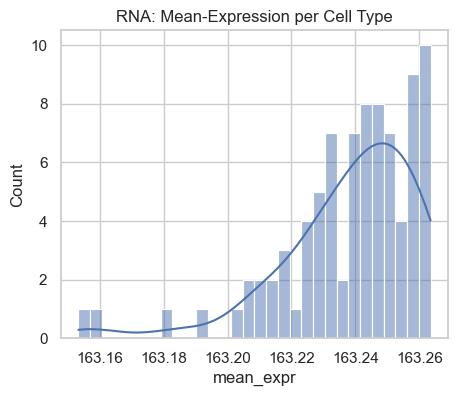

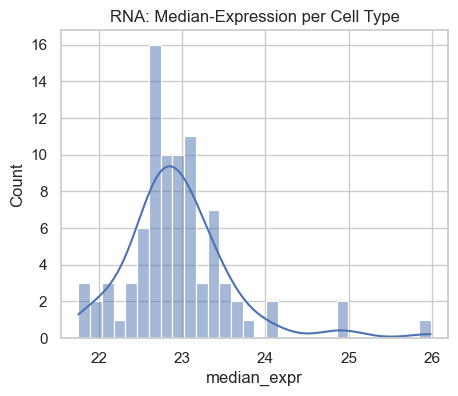

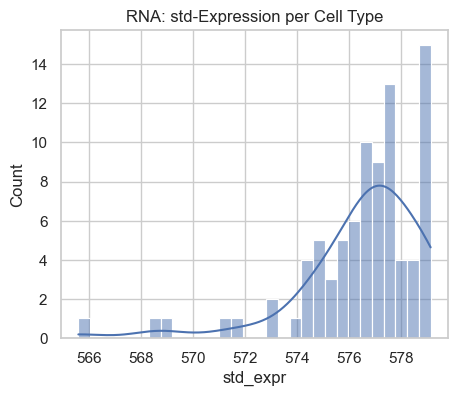

,mean_expr,median_expr,std_expr
LTHSC.34-.BM,163.261162,22.788066,576.884525
LTHSC.34+.BM,163.261089,23.117322,576.925735
STHSC.150-.BM,163.260318,23.353421,577.574457
MPP4.135+.BM,163.260179,22.886122,577.409321
proB.CLP.BM,163.258616,23.643738,571.296896
...,...,...,...
FRC.SLN,163.262712,23.519148,576.022402
IAP.SLN,163.262576,24.950026,568.594767
BEC.SLN,163.262353,23.488316,573.821391
LEC.SLN,163.263143,23.127040,575.874869


In [102]:

rna_cell_stats = pd.DataFrame({
    "mean_expr":   rna.mean(axis=0),
    "median_expr": rna.median(axis=0),
    "std_expr":    rna.std(axis=0)
})
# Merge QC if desired (e.g. InputCellNumber)
#if "PF.reads" in meta1.columns:
#    rna_cell_stats["PF.reads"] = meta1.groupby("CellType")["PF.reads"].sum()

plt.figure(figsize=(5,4))
sns.histplot(rna_cell_stats["mean_expr"], bins=30, kde=True)
plt.title("RNA: Mean-Expression per Cell Type")
plt.show()

plt.figure(figsize=(5,4))
sns.histplot(rna_cell_stats["median_expr"], bins=30, kde=True)
plt.title("RNA: Median-Expression per Cell Type")
plt.show()

plt.figure(figsize=(5,4))
sns.histplot(rna_cell_stats["std_expr"], bins=30, kde=True)
plt.title("RNA: std-Expression per Cell Type")
plt.show()

rna_cell_stats


In [66]:
# 4.1 Peak stats
peak_stats = pd.DataFrame({
    "mean_access": atac.mean(axis=1, numeric_only=True),
    "var_access":  atac.var(axis=1, numeric_only=True),
    "cv_access":   atac.std(axis=1, numeric_only=True)/(atac.mean(axis=1, numeric_only=True)+1e-6)
})

peak_stats

c:\Users\luisw\miniconda3\envs\data_analysis\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\luisw\miniconda3\envs\data_analysis\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,,,mean_access,var_access,cv_access
ImmGenATAC1219.peakID,chrom,Summit,,,
ImmGenATAC1219.peak_1,chr1,3020786,1.036739,1.006191,0.967543
ImmGenATAC1219.peak_2,chr1,3087226,0.914239,0.742985,0.942822
ImmGenATAC1219.peak_3,chr1,3120109,1.599570,44.595600,4.174866
ImmGenATAC1219.peak_4,chr1,3121485,0.891183,2.331189,1.713253
ImmGenATAC1219.peak_5,chr1,3372787,0.877500,0.662129,0.927307
...,...,...,...,...,...
ImmGenATAC1219.peak_512591,chrY,90812450,6.766022,24.083624,0.725316
ImmGenATAC1219.peak_512592,chrY,90812906,6.814731,19.657464,0.650601
ImmGenATAC1219.peak_512593,chrY,90813175,1.673370,1.219724,0.659992


In [ ]:
meta = meta1.groupby("CellType").sum().join(meta2.groupby("population.name").sum())
meta = meta.drop(columns=["%chrM.mapped", "%fragment.1Kb_TSS", "overal_ alignment_rate%", "Replicate.cor"]) #TODO: proper calculation
meta_num = meta.select_dtypes([np.number])

atac_correlation = pd.DataFrame(columns=cell_stats.columns, index=meta_num.columns)
for col in cell_stats.columns:
    for key in meta_num.columns:
        atac_correlation.loc[key, col] = cell_stats[col].corr(meta[key], method='pearson') 

atac_correlation


,mean_expr,median_expr,std_expr
InputCellNumber,-0.313436,-0.081703,0.037869
PF.reads,-0.348798,-0.127395,0.042414
Paired.read.after.removing.PCR.duplication,-0.369,-0.0284,-0.013434
total.reads,0.063125,0.234009,-0.3615
mapped_MAPQ5,0.084665,0.270906,-0.418942
reads.after.removing.duplication,0.088697,0.286657,-0.422818
properly_paired.reads,0.086973,0.283988,-0.421814
paired.count,0.086973,0.283988,-0.421814
total.Htseq-count.on.genes,0.086448,0.28453,-0.422432


In [ ]:
rna_correlation = pd.DataFrame(columns=rna_cell_stats.columns, index=meta_num.columns)
for col in rna_cell_stats.columns:
    for key in meta_num.columns:
        rna_correlation.loc[key, col] = rna_cell_stats[col].corr(meta[key], method='pearson') 

rna_correlation

,mean_expr,median_expr,std_expr
InputCellNumber,-0.313436,-0.081703,0.037869
PF.reads,-0.348798,-0.127395,0.042414
Paired.read.after.removing.PCR.duplication,-0.369,-0.0284,-0.013434
total.reads,0.063125,0.234009,-0.3615
mapped_MAPQ5,0.084665,0.270906,-0.418942
reads.after.removing.duplication,0.088697,0.286657,-0.422818
properly_paired.reads,0.086973,0.283988,-0.421814
paired.count,0.086973,0.283988,-0.421814
total.Htseq-count.on.genes,0.086448,0.28453,-0.422432
